# Projet 3 : Identifier les facteurs qui influencent les performances commerciales

# Problématique
Une entreprise souhaite suivre les performances de ses ventes uelles sont les combinaisons de produits, clients et zones géographiques qui génèrent les meilleures performances commerciales ?   Quels facteurs freinent la rentabilité (ex. remises, produits peu rentables) ?


## Objectif du projet

Ce projet vise à identifier les facteurs qui influencent les performances commerciales d'une entreprise en analysant les relations entre produits, régions, segments clients, remises et marges. L'objectif final est de guider les décisions stratégiques pour optimiser les ventes et la rentabilité.



## Importation des librairies et préparation des données

### Librairies

In [1]:
# Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, mannwhitneyu, kruskal, wilcoxon
import scikit_posthocs as sp

## Informations sur la data frame

In [2]:
# Importation du dataframe
store=pd.read_excel("superstore.xlsx")
display(store)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
# Dimension de la base de donnée
store.shape

(9994, 21)

La base de donnée est composée de **9994** clients caractérisés par **21** variables.

In [4]:
# Liste des variables
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Selection des variables necessaires pour l'analyse 
var=['Order Date', 'Ship Date','Ship Mode','Segment','State','Region','Category', 'Sub-Category','Product Name','Sales', 'Quantity', 'Discount', 'Profit']
store=store[var]
store.head()

,Order Date,Ship Date,Ship Mode,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Dimension de la base de donnée après selection des variables 
store.shape

(9994, 13)

In [7]:
# Determination des différents types de variables dans notre base de donnéess
store.dtypes

Order Date       object
Ship Date        object
Ship Mode        object
Segment          object
State            object
Region           object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# Analyse de l'ensemble des variables de la base de données
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Ship Mode     9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Product Name  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [9]:
# Combien y a-t-il de valeurs différentes par colonne ? 
store.nunique()

Order Date      1237
Ship Date       1334
Ship Mode          4
Segment            3
State             49
Region             4
Category           3
Sub-Category      17
Product Name    1850
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# 📊 Vue d'ensemble des performances


Cette partie donnera une vision claire des ventes et profits selon les catégories de produits, régions, segments clients, pour détecter les premières tendances avant l’analyse plus fine. On procedera en suivant ces étapes :
- Aperçu des performances globales (somme des ventes et profits)
- Ventes et profits par catégorie de produit
- Ventes et profits par région
- Ventes et profits par segment client
- Visualisation des produits les plus vendus et des plus rentables

In [10]:
# Aperçu global : total des ventes et du profit
totaux = store[["Sales", "Profit"]].sum().to_frame(name="Total")
totaux["Total"] = totaux["Total"].apply(lambda x: f"{x:,.2f}")
totaux

,Total
Sales,"2,297,200.86"
Profit,"286,397.02"



- Le chiffre d’affaires total s'élève à **2 297 200,86**.
- Le bénéfice total généré est égale à **286 397.02**.

Ces chiffres indiquent une **marge globale relativement modeste (12,47%)**, ce qui justifie d'explorer en détail les leviers d'amélioration de la rentabilité (remises, catégories de produits, zones géographiques...).


## Par catégorie de produit

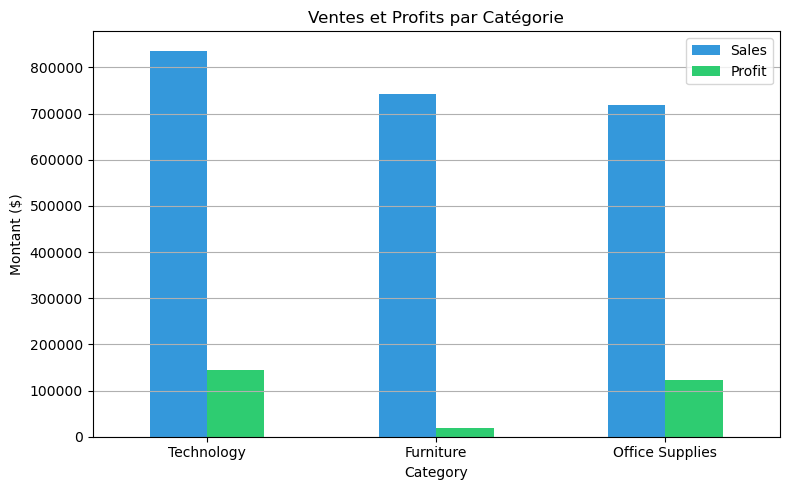

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [11]:
# Regroupement par catégorie
category_perf = store.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

# Affichage des performances par catégorie
category_perf.plot(kind="bar", figsize=(8,5), title="Ventes et Profits par Catégorie", color=["#3498db", "#2ecc71"])
plt.ylabel("Montant ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
category_perf

- **Technology** est la **catégorie la plus performante**, générant à la fois **le plus de ventes** et **le plus de profit**.
- **Office Supplies** affiche un bon équilibre : des ventes proches de "Furniture", mais une **rentabilité bien plus élevée** (122 490 de profit contre seulement 18 451 pour Furniture).
- **Furniture** est la **moins rentable des trois catégories**, malgré des ventes proches de Technology

## 🌍 Par région

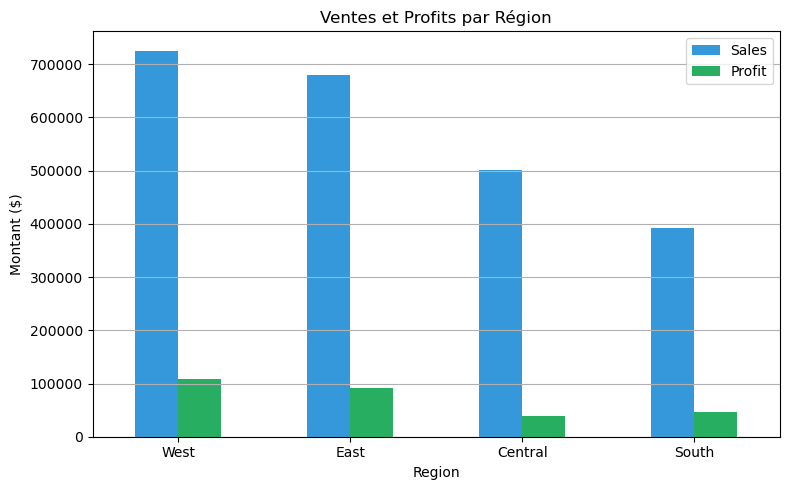

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


In [12]:
# Regroupement par région
region_perf = store.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

# Affichage des performances par region
region_perf.plot(kind="bar", figsize=(8,5), title="Ventes et Profits par Région", color=["#3498db", "#27ae60"])
plt.ylabel("Montant ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
region_perf


- La **région West** est la plus performante à la fois en **chiffre d'affaires** et en **profit**, ce qui en fait une zone stratégique clé pour l’entreprise.
- La région **East** suit de près, avec de bons volumes de ventes et une rentabilité satisfaisante.
- Les régions **Central** et **South** génèrent moins de ventes, avec une **rentabilité particulièrement faible** dans la zone Central (seulement 39 706 de profit pour plus de 500 000 de ventes).
- La **rentabilité est plus faible dans les régions Central et South**, ce qui peut indiquer :
  - Des produits moins performants dans ces zones
  - Ou des politiques de remise plus agressives

## 🧑‍💼 Par segment client

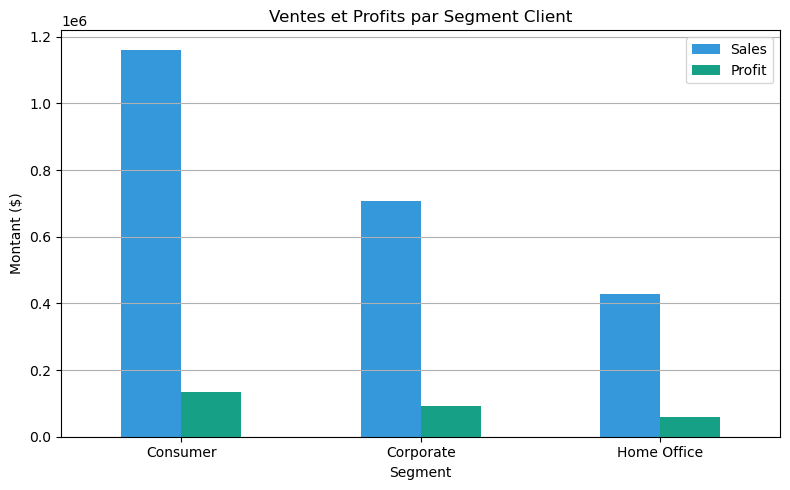

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [13]:
# Regroupement par segment client
segment_perf = store.groupby("Segment")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

# Affichage des performances par segment client
segment_perf.plot(kind="bar", figsize=(8,5), title="Ventes et Profits par Segment Client", color=["#3498db", "#16a085"])
plt.ylabel("Montant ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
segment_perf


- Le **segment "Consumer"** génère **le plus gros volume de ventes** (plus de 1,1 M), ce qui le positionne comme **marché principal**.
- Le segment **"Corporate"** représente un bon compromis entre volume et profit (~92K de profit).
- Le segment **"Home Office"** est **le moins important en chiffre d'affaires**, mais sa **rentabilité relative est élevée** (~60K de profit pour 430K de ventes).


## 🏆 Top Etat et Top produits

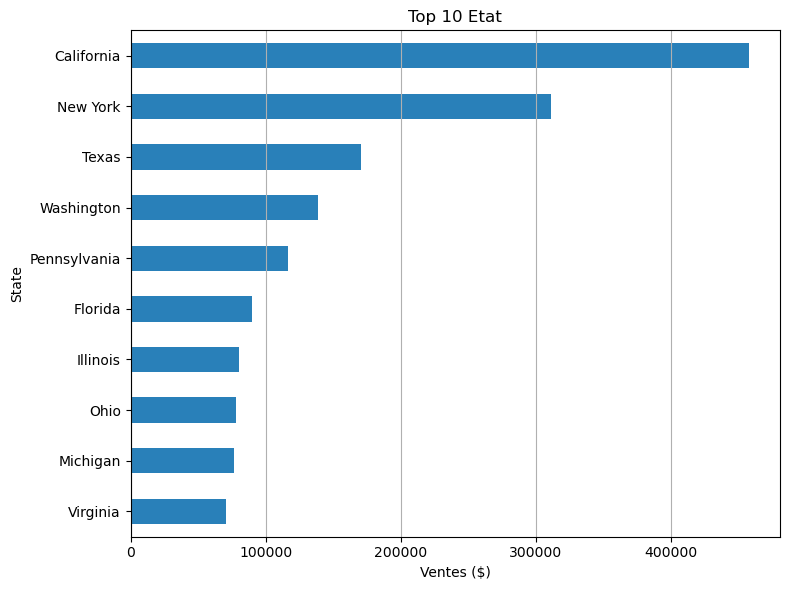

In [38]:
# Top 10 Etat par ventes
top_sales = store.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)
top_sales.plot(kind="barh", title="Top 10 Etat", figsize=(8,6), color="#2980b9")
plt.xlabel("Ventes ($)")
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
# plt.savefig("assets/Top_10_Etat.png") # Script pour exporter l'image
plt.show()

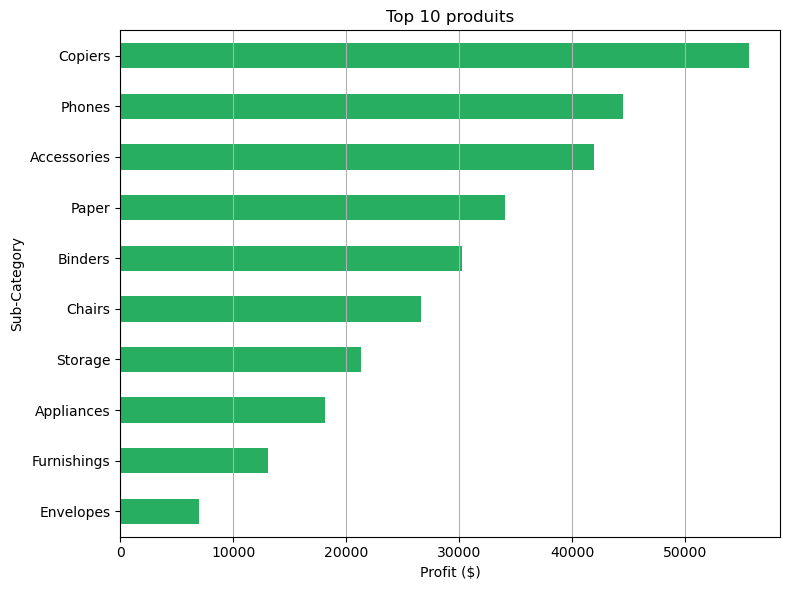

In [37]:
# Top 10 produits par profit
top_profit = store.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10)
top_profit.plot(kind="barh", title="Top 10 produits", figsize=(8,6), color="#27ae60")
plt.xlabel("Profit ($)")
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
# plt.savefig("assets/Top_10_produits.png") # Script pour exporter l'image
plt.show()

## Vue générale des performances

L’analyse des ventes et du profit par **catégorie**, **région** et **segment** révèle des tendances majeures :

1. **Catégories de produits**
   - *Technology* est la plus rentable : volume élevé et forte marge.
   - *Office Supplies* affiche un bon équilibre : ventes importantes et rentabilité correcte (~17 %).
   - *Furniture* présente un problème : malgré des ventes élevées, la marge est très faible (~2,5 %), ce qui questionne la stratégie de prix, de remises ou les coûts logistiques.

2. **Régions**
   - *West* et *East* sont les plus avantageuses : fort volume et solidité de la marge.
   - *Central* et *South* font apparaître des ventes plus faibles mais aussi une rentabilité réduite, avec *Central* particulièrement préoccupante en termes de profitabilité.

3. **Segments clients**
   - *Consumer* est le segment le plus volumineux, avec une marge correcte (~11,5 %).
   - *Home Office*, bien que plus petit en volume, est le plus rentable proportionnellement (~14 %) : un segment à fort potentiel pour la croissance rentable.
   - *Corporate* offre un équilibre satisfaisant, avec une marge d’environ 13 %.

---

**Implications business immédiates**

- Poursuivre ou renforcer les efforts sur **Technology** et le segment **Home Office**, grâce à leur profil performant (volume + marge ou bonne marge).
- **Revoir la stratégie Furniture** (prix, remises, coûts) pour améliorer sa rentabilité, ou réduire son poids dans les recommandations.
- Adapter l’allocation des ressources marketing/logistiques vers les zones les plus porteuses (*West*, *East*), tout en approfondissant les leviers d’optimisation dans les régions moins rentables (*Central*, *South*).

---

Ces conclusions justifient désormais l’analyse des **corrélations** pour évaluer l’impact des remises et des quantités sur les marges et les ventes.

# Analyse des corrélations entre variables quantitatives

Pour mieux comprendre l’influence des variables numériques sur la performance commerciale, nous allons mesurer leur **relation**. Cette étape va nous aider à orienter les priorités pour la suite de l’analyse.


## Corrélation entre variables quantitatives

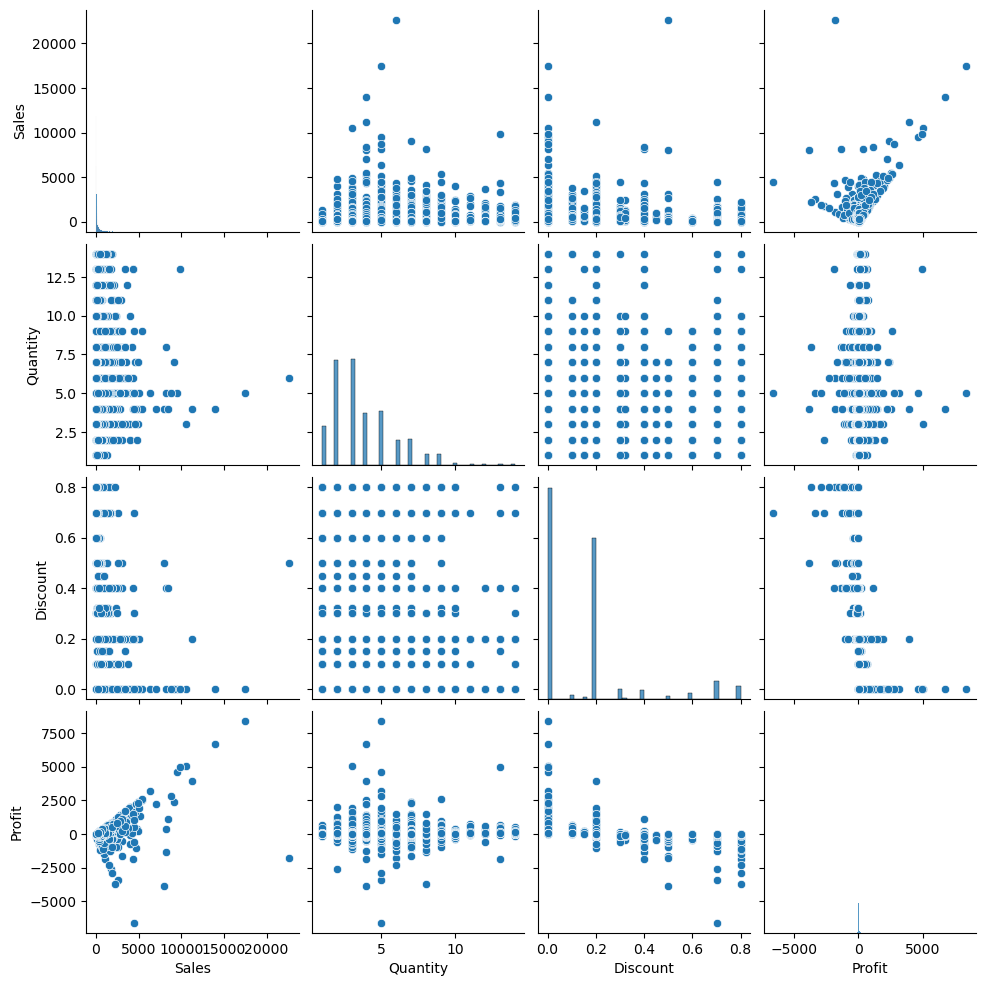

In [16]:
# Visualisation de la correlation
sns.pairplot(store,kind="scatter")

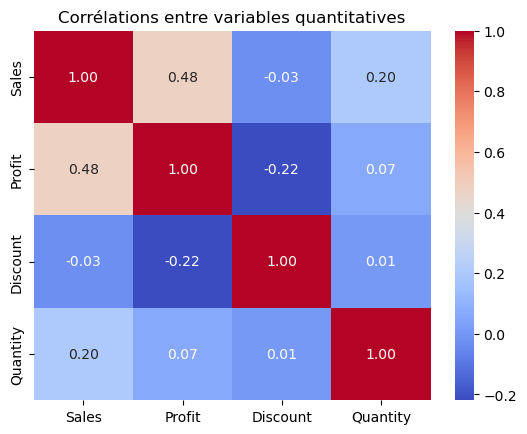

In [17]:
# Heatmap
quanti_vars = ["Sales", "Profit", "Discount", "Quantity"]
sns.heatmap(store[quanti_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre variables quantitatives")
plt.savefig("assets/Heatmap.png", bbox_inches='tight', dpi=300)
plt.show()

**Ventes ↔ Profit (r = 0.48)**  
Le lien entre ventes et profit est modéré : vendre plus permet généralement d’augmenter le profit.


**Profit ↔ Discount (r = –0.22)**  
Les remises ont un effet négatif sur la marge, même léger : une hausse des remises entraîne une **baisse du profit**, même si l’effet n’est pas très marqué.

**Quantity ↔ Sales (r = 0.20)**  
La Corrélation est **faiblement positive**. Vendre plus d’articles engendre un peu plus de chiffre d’affaires, mais pas dans une proportion forte.

Nous allons à présent creuser les trois relations identifiées (ventes ↔ profit, remise ↔ profit, quantité ↔ ventes) avec des tests et visuels dédiés.  
L’objectif est d’en extraire des **insights exploitables** pour orienter concrètement la stratégie commerciale.

## Scatterplot : Ventes vs Profit

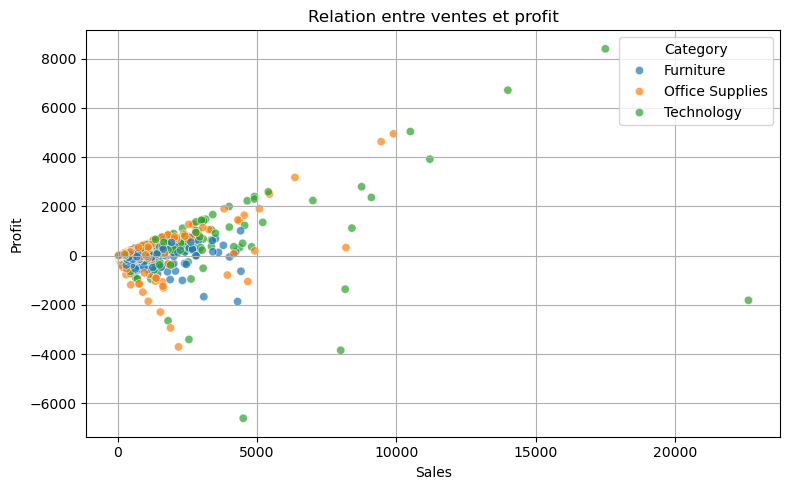

Coefficient de corrélation de Spearman: 0.5184066611400607
Valeur p: 0.0


In [18]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=store, x="Sales", y="Profit", hue="Category", alpha=0.7)
plt.title("Relation entre ventes et profit")
plt.grid(True)
plt.tight_layout()
plt.show()

# Corrélation de spearman
correlation, p_value = spearmanr(store['Sales'], store['Profit'])
print(f"Coefficient de corrélation de Spearman: {correlation}")
print(f"Valeur p: {p_value}")


Cette corrélation met en avant une **relation cohérente entre volume de ventes et rentabilité**, ce qui valide l’idée que **booster les ventes peut effectivement améliorer les profits**, à condition de **maîtriser les marges et les coûts**.  
Cela renforce l’intérêt de prioriser les catégories ou segments qui génèrent à la fois un bon chiffre d’affaires et de bonnes marges, tout en veillant à **éviter les ventes massives à prix cassés**.

## Scatterplot : Remise vs Profit

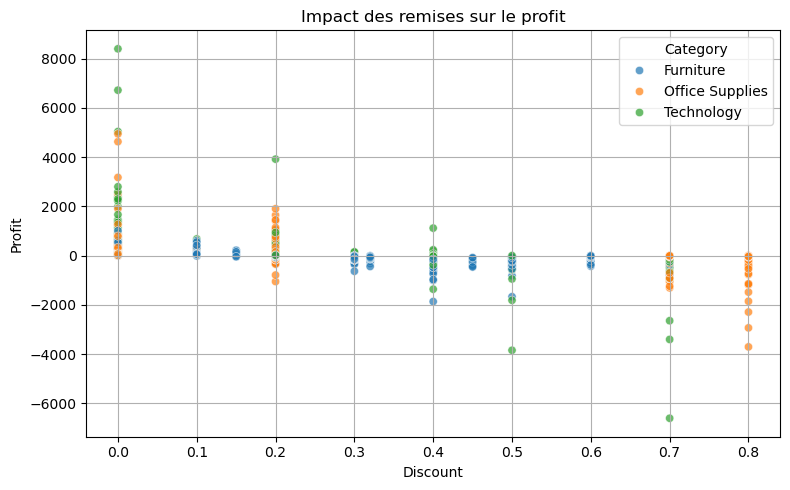

Coefficient de corrélation de Spearman: -0.5433501822306213
Valeur p: 0.0


In [19]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=store, x="Discount", y="Profit", hue="Category", alpha=0.7)
plt.title("Impact des remises sur le profit")
plt.grid(True)
plt.tight_layout()
plt.show()

# Corrélation de spearman
correlation, p_value = spearmanr(store['Discount'], store['Profit'])
print(f"Coefficient de corrélation de Spearman: {correlation}")
print(f"Valeur p: {p_value}")

**Remises ↔ rentabilité** : le caractère négatif et significatif de la relation indique que les politiques de remise sont potentiellement un **levier crucial** pour préserver les marges.

**Nécessité de limites** : une corrélation de cette ampleur justifie de poser des **seuils de remise maximum** ou de cibler leur application (ex. uniquement sur certains segments ou produits rentables).

**Orientation stratégique** : ajuster la politique de remise (tant dans la déclinaison que dans les conditions d'application) pourrait avoir un impact direct et sensible sur la rentabilité globale.


## Scatterplot : Ventes vs Quantité

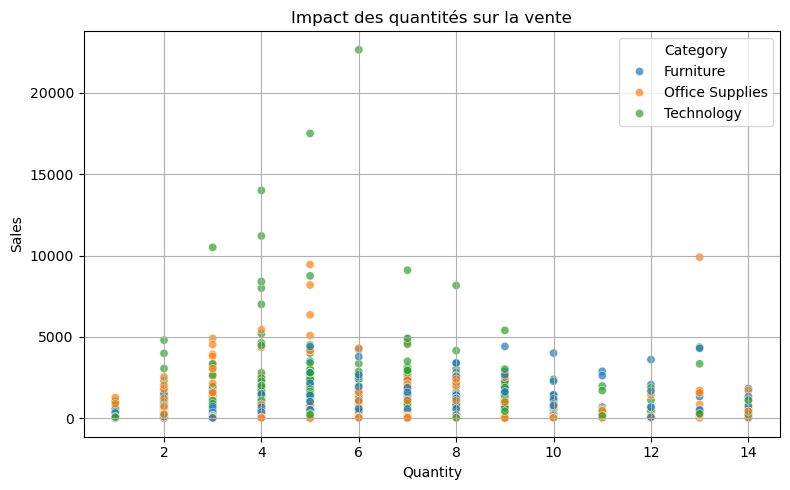

Coefficient de corrélation de Spearman: 0.23449120312278687
Valeur p: 6.613122683588296e-125


In [20]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=store, x="Quantity", y="Sales", hue="Category", alpha=0.7)
plt.title("Impact des quantités sur la vente")
plt.grid(True)
plt.tight_layout()
plt.show()

# Corrélation de spearman
correlation, p_value = spearmanr(store['Quantity'], store['Profit'])
print(f"Coefficient de corrélation de Spearman: {correlation}")
print(f"Valeur p: {p_value}")

Le resultat du test indique une corrélation positive mais faible entre le nombre d’articles vendus et le chiffre d’affaires.
Cela signifie que vendre plus d’unités contribue à augmenter les ventes, mais pas de façon proportionnelle.
Enfin, il ne suffit pas de maximiser les volumes vendus. Il faut favoriser les produits avec un bon ratio quantité/prix, et cibler les ventes de valeur plutôt que le volume à bas prix.

## Conclusion

Cette phase a permis d’analyser les principales relations chiffrées entre les ventes, les remises, les quantités vendues et la rentabilité. Les enseignements clés sont les suivants :

- 🔼 **Ventes ↔ Profit** (`r ≈ 0.48`)  
  ➤ Relation modérée et significative.  
  👉 **Booster les ventes** améliore la rentabilité, à condition de ne pas sacrifier les marges.

- 🔻 **Remise ↔ Profit** (`r ≈ –0.22`)  
  ➤ Corrélation négative claire.  
  👉 **Les remises nuisent à la marge**, surtout si elles sont mal ciblées. Des règles de remise strictes sont à envisager.

- ➕ **Quantity ↔ Sales** (`r ≈ 0.23`)  
  ➤ Corrélation faible mais significative.  
  👉 **Vendre plus n’est pas toujours synonyme de meilleures ventes**. Il faut **favoriser les produits avec un bon rendement unitaire**, et pas seulement ceux qui se vendent beaucoup.


## Synthèse stratégique

Pour maximiser la performance commerciale, il est recommandé de :

- **Encadrer les remises** : fixer des seuils et les appliquer selon la rentabilité des produits ou segments.
- **Privilégier les produits à forte valeur unitaire** plutôt que de pousser uniquement le volume.
- **Concentrer les efforts sur les combinaisons gagnantes** (produits + segments + zones géographiques) qui génèrent à la fois du chiffre d’affaires **et** des marges.

# Analyse des relations entre variables qualitatives et quantitatives

L’objectif de cette phase est de comprendre **comment certaines variables qualitatives clés** (comme le segment client, la région géographique ou la catégorie de produit) influencent directement les **indicateurs de performance quantitatifs**, notamment le **profit** ou la **vente**.

Alors pour répondre à cette question, nous combinons :
- Des **visualisations** (boxplots) pour observer la distribution des profits selon chaque modalité.
- Des **tests statistiques** pour déterminer si les différences observées sont **significatives** ou dues au hasard.

Les résultats permettront d’identifier des **cibles commerciales prioritaires**, de mieux orienter les **actions marketing**, et d’**ajuster les offres** selon les profils clients ou les régions les plus rentables.


## Vente selon la Région

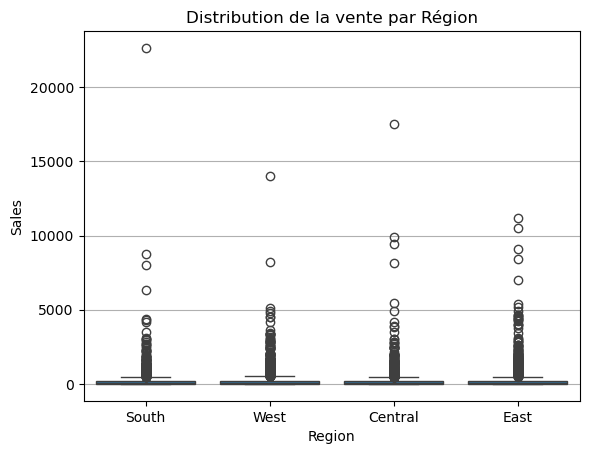

Kruskal-Wallis Profit ~ Region : p-value = 0.0000


In [21]:
sns.boxplot(data=store, x="Region", y="Sales")
plt.title("Distribution de la vente par Région")
plt.grid(axis='y')
plt.show()

regions = [group["Sales"].values for name, group in store.groupby("Region")]
kruskal_region = kruskal(*regions)
print(f"Kruskal-Wallis Profit ~ Region : p-value = {kruskal_region.pvalue:.4f}")


Le chiffre d'affaires varie significativement selon les régions (Kruskal-Wallis, p < 0.001). Cela suggère que le chiffre d'affaires varie de manière significative d'une région à l'autre, ce qui peut refléter des disparités dans les performances commerciales selon les zones géographiques.
Il est donc **stratégiquement pertinent d’adapter la stratégie commerciale selon la région** :
 - Capitaliser sur les régions les plus performantes,
 - Identifier les freins et opportunités dans les zones moins rentables.


In [22]:
# Test de Dunn entre toutes les paires de régions, sur les ventes
dunn_result = sp.posthoc_dunn(store, val_col="Sales", group_col="Region", p_adjust="bonferroni")
# Affichage des résultats
print("Résultats du test de Dunn (p-valeurs ajustées):")
print(dunn_result)

Résultats du test de Dunn (p-valeurs ajustées):
          Central      East     South      West
Central  1.000000  0.007615  0.064008  0.000002
East     0.007615  1.000000  1.000000  0.353012
South    0.064008  1.000000  1.000000  0.394130
West     0.000002  0.353012  0.394130  1.000000


L’analyse post-hoc révèle que la **région "Central" se démarque significativement** par rapport aux autres, notamment la région "West".
> Cela suggère que **les performances commerciales dans la région Central sont structurellement différentes** (soit bien meilleures, soit plus faibles — à confirmer par une visualisation).
> En revanche, **les régions East, South et West présentent des niveaux de chiffre d'affaires similaires**.

🎯 **Actions recommandées** :
- Explorer les **facteurs qui expliquent la performance (ou contre-performance) de "Central"** : type de clients ? produits vendus ? remises ?
- **Capitaliser sur les pratiques efficaces** si "Central" surperforme.
- **Redéployer les efforts commerciaux** dans "West" si elle sous-performe.



## Vente selon le segment client

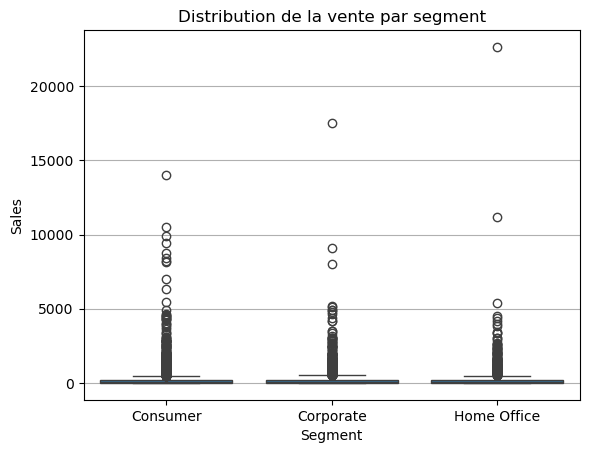

Kruskal-Wallis Vente ~ Segment : p-value = 0.7103


In [23]:
sns.boxplot(data=store, x="Segment", y="Sales")
plt.title("Distribution de la vente par segment")
plt.grid(axis='y')
plt.show()

segment = [group["Sales"].values for name, group in store.groupby("Segment")]
kruskal_segment = kruskal(*segment)
print(f"Kruskal-Wallis Vente ~ Segment : p-value = {kruskal_segment.pvalue:.4f}")


On ne détecte **aucune différence significative** entre les **segments clients** en ce qui concerne le chiffre d'affaires généré. Cela signifie que **les ventes sont globalement équilibrées** entre les differents type de clientèle dont nous disposons : "Consumer", "Corporate" et "Home Office".

🎯 D’un point de vue stratégique :
- Il **n’est pas pertinent de prioriser un segment uniquement sur la base du volume de ventes**.
- Il conviendra d'examiner plutôt **la rentabilité (Profit)**, **les remises** ou **les produits achetés** par segment pour identifier des leviers d'optimisation.


## Vente selon la catégorie

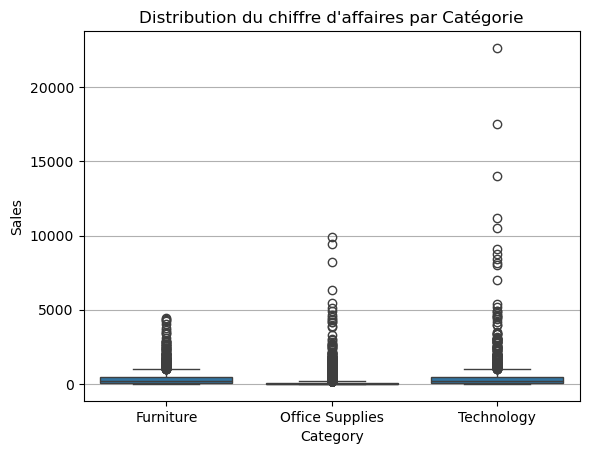

Kruskal-Wallis Vente ~ catégorie : p-value = 0.0000


In [24]:
sns.boxplot(data=store, x="Category", y="Sales")
plt.title("Distribution du chiffre d'affaires par Catégorie")
plt.grid(axis='y')
plt.show()

catégorie = [group["Sales"].values for name, group in store.groupby("Category")]
kruskal_catégorie = kruskal(*catégorie)
print(f"Kruskal-Wallis Vente ~ catégorie : p-value = {kruskal_catégorie.pvalue:.4f}")



Le chiffre d’affaires varie significativement selon la **catégorie de produit** (Kruskal-Wallis, p < 0.001). Cela signifie que **certaines catégories génèrent systématiquement plus de ventes** que d’autres.

🎯 D’un point de vue stratégique :
- Il est pertinent de **prioriser les familles de produits** les plus vendeuses.
- Une analyse plus fine (ex : sous-catégories, marges associées) permettra d’affiner la stratégie produit.
- Les catégories moins performantes méritent d’être **réévaluées** : faible demande, mauvaise exposition, ou marges faibles ?


In [25]:
# Test de Dunn entre toutes les paires de régions, sur les ventes
dunn_result1 = sp.posthoc_dunn(store, val_col="Sales", group_col="Category", p_adjust="bonferroni")
# Affichage des résultats
print("Résultats du test de Dunn (p-valeurs ajustées):")
print(dunn_result1)

Résultats du test de Dunn (p-valeurs ajustées):
                     Furniture  Office Supplies  Technology
Furniture         1.000000e+00    9.261185e-287    0.001542
Office Supplies  9.261185e-287     1.000000e+00    0.000000
Technology        1.542046e-03     0.000000e+00    1.000000



Toutes les catégories présentent des **écarts significatifs de chiffre d’affaires** entre elles.
Cela signifie que **chaque catégorie a un profil de performance propre**, et qu'elles ne se valent pas du tout commercialement : la **Technology** génèrent un volume de ventes très élevé suivi de la **Furniture** qui également performe plus que les **Office Supplies**.

Ces différences justifient une **stratégie produit différenciée** :
- Mieux calibrer les **stocks, promotions et efforts commerciaux** par catégorie.
- Tenir compte de la **rentabilité unitaire** : une catégorie à faible CA peut rester stratégique si ses **marges sont élevées**.


## Profit selon la catégorie

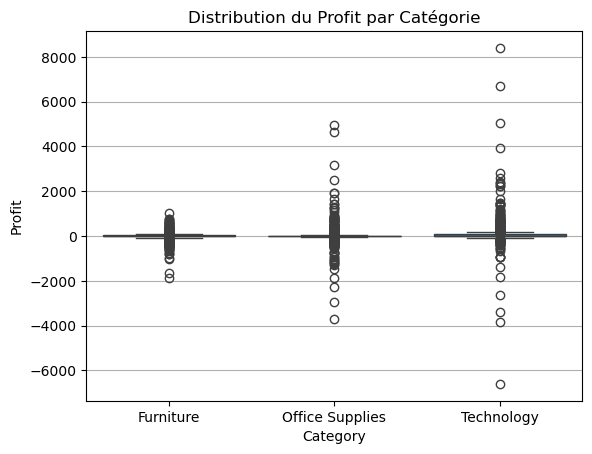

Kruskal-Wallis Profit ~ Catégorie : p-value = 0.0000


In [26]:
sns.boxplot(data=store, x="Category", y="Profit")
plt.title("Distribution du Profit par Catégorie")
plt.grid(axis='y')
plt.show()

cat_profit = [group["Profit"].values for name, group in store.groupby("Category")]
kruskal_cat_profit = kruskal(*cat_profit)
print(f"Kruskal-Wallis Profit ~ Catégorie : p-value = {kruskal_cat_profit.pvalue:.4f}")



On remarque que les **marges (profits) diffèrent significativement selon les catégories de produits**. Autrement dit, toutes les familles de produits **ne contribuent pas de la même façon à la rentabilité**.

🎯 Implications :
- Cela confirme qu'une stratégie commerciale efficace ne peut pas reposer uniquement sur le chiffre d'affaires.
- Certaines catégories **générerent beaucoup de ventes mais peu de profit** (ex : produits d'appel, prix cassés).
- À l’inverse, des catégories moins vendues peuvent être **plus rentables à l’unité** (ex : mobilier haut de gamme, accessoires tech).

💡 Il est donc crucial de croiser cette info avec les volumes de ventes (vus précédemment) pour :
- Prioriser les **catégories rentables ET vendeuses**,
- Réduire les efforts sur celles qui **n’apportent ni volume ni marge**,
- Repenser les conditions tarifaires ou promotions sur les catégories à faible marge.


In [27]:
# Test de Dunn entre toutes les paires de régions, sur les ventes
dunn_result2 = sp.posthoc_dunn(store, val_col="Profit", group_col="Category", p_adjust="bonferroni")
# Affichage des résultats
print("Résultats du test de Dunn (p-valeurs ajustées):")
print(dunn_result2)

Résultats du test de Dunn (p-valeurs ajustées):
                    Furniture  Office Supplies    Technology
Furniture        1.000000e+00     1.393250e-01  1.814029e-73
Office Supplies  1.393250e-01     1.000000e+00  1.895412e-87
Technology       1.814029e-73     1.895412e-87  1.000000e+00



Les profits générés par les produits **"Technology"** sont **significativement différents (et supérieurs)** à ceux des deux autres catégories.
En revanche, la catégorie **"Furniture"** présentent une rentabilité très faible par rapport à la catégorie **"Office Supplies"** malgré un chiffre d'affaires un peu plus élevé. 

Implications :
- La **catégorie "Technology" est clairement la plus rentable** et doit être **stratégiquement priorisée** : meilleure marge unitaire
- Renforcement des strategies pour les autres catégories **"Furniture"** et **"Office Supplies"** pour renforcer leur performance.


## Synthèse – Analyse quali-quanti

Cette phase a permis d’identifier des groupes de clients, de produits et de zones géographiques qui influencent significativement les performances commerciales.
Les catégories de produits apparaissent comme un levier clé, à la fois sur les ventes et la rentabilité. Les régions montrent aussi des différences marquées de performances. En revanche, le segment client n’est pas un critère discriminant en volume.

Recommandations stratégiques :

- Renforcer la gamme "Technology" : elle combine volume et profit, ce qui en fait un levier central de croissance.

- Adapter la stratégie commerciale selon la région : valoriser les zones dynamiques, redynamiser les plus faibles.

- Repenser la gestion des segments clients.

# Analyse des interactions quali-quali

Dans cette étape, nous cherchons à comprendre s’il existe une relation entre les différentes dimensions qualitatives de l’activité commerciale : Qui achète ? (Segment) ; Où ? (Region) et Quoi ? (Category)

Ainsi, l'objectif est d'identifier si certaines combinaisons spécifiques (ex. : des profils de clients dans des zones géographiques données) sont significativement plus fréquentes que d’autres.
Cela permet de :

- Cibler plus efficacement les segments de clientèle selon la zone,

- Optimiser l’offre produit localement,

- Déployer des stratégies marketing différenciées.

Pour cela, nous utilisons le test du Chi² d’indépendance, qui permet de déterminer si deux variables qualitatives sont dépendantes ou non.

In [28]:
# 1. Segment ↔ Region
ct_seg_region = pd.crosstab(store["Segment"], store["Region"])
chi2_1, p1, _, _ = chi2_contingency(ct_seg_region)
print(f"Chi² Segment ~ Region : p-value = {p1:.4f}")


# 2. Segment ↔ Category
ct_seg_cat = pd.crosstab(store["Segment"], store["Category"])
chi2_2, p2, _, _ = chi2_contingency(ct_seg_cat)
print(f"Chi² Segment ~ Category : p-value = {p2:.4f}")


# 3. Category ↔ Region
ct_cat_region = pd.crosstab(store["Category"], store["Region"])
chi2_3, p3, _, _ = chi2_contingency(ct_cat_region)
print(f"Chi² Category ~ Region : p-value = {p3:.4f}")

Chi² Segment ~ Region : p-value = 0.5446
Chi² Segment ~ Category : p-value = 0.8335
Chi² Category ~ Region : p-value = 0.7223


## Conclusion
Les p-values obtenues sont toutes supérieures au seuil de 0.05, ce qui signifie qu’aucune dépendance statistiquement significative n’a été détectée entre ces variables. 

Autrement dit :  
- La répartition des segments clients est **relativement homogène** d’une région à l’autre.  
- Les différents segments achètent des catégories de produits **similaires**, sans préférence marquée.  
- La distribution des catégories de produits est stable selon la région.

Ces résultats suggèrent que la stratégie commerciale ne nécessite pas, à ce stade, d’adaptation spécifique selon la région en termes de ciblage client ou d’offre produit.


# Synthèse & recommandations stratégiques

## Vue générale des performances

L’analyse des ventes et du profit par **catégorie**, **région** et **segment** révèle des tendances majeures :

1. **Catégories de produits**  
   - *Technology* est la plus rentable : volume élevé et forte marge.  
   - *Office Supplies* affiche un bon équilibre : ventes importantes et rentabilité correcte (~17 %).  
   - *Furniture* présente un problème : malgré des ventes élevées, la marge est très faible (~2,5 %), ce qui questionne la stratégie de prix, de remises ou les coûts logistiques.

2. **Régions**  
   - *West* et *East* sont les plus avantageuses : fort volume et solidité de la marge.  
   - *Central* et *South* font apparaître des ventes plus faibles mais aussi une rentabilité réduite, avec *Central* particulièrement préoccupante en termes de profitabilité.

3. **Segments clients**  
   - *Consumer* est le segment le plus volumineux, avec une marge correcte (~11,5 %).  
   - *Home Office*, bien que plus petit en volume, est le plus rentable proportionnellement (~14 %) : un segment à fort potentiel pour la croissance rentable.  
   - *Corporate* offre un équilibre satisfaisant, avec une marge d’environ 13 %.

---

## Synthèse des résultats clés

- **Relations quantitatives :**  
  - Une corrélation modérée positive entre **ventes et profits** confirme que **booster le chiffre d’affaires peut améliorer la rentabilité**, à condition de maîtriser les marges.  
  - La corrélation négative entre **remises et profits** souligne que **les remises excessives impactent négativement la rentabilité**, ce qui impose un contrôle rigoureux.  
  - La relation faible entre **quantité vendue et chiffre d’affaires** montre que vendre en volume ne garantit pas forcément une forte croissance du CA.

- **Comparaisons quali-quanti :**  
  - Les profits diffèrent significativement selon la **région** et la **catégorie de produits**, avec certaines régions ou catégories plus rentables.  
  - Les ventes ne varient pas significativement selon le segment client, mais diffèrent fortement selon la catégorie.

- **Relations quali-quali :**  
  - Les tests du Chi² n’ont pas révélé de dépendances significatives entre **segment, région** et **catégorie**, indiquant une répartition homogène.

---

## Recommandations stratégiques

1. **Poursuivre et renforcer les segments porteurs**  
   Mettre l’accent sur la catégorie *Technology* et le segment *Home Office*, qui présentent un fort potentiel en termes de volume et de rentabilité.

2. **Revoir la stratégie Furniture**  
   Réévaluer la politique tarifaire, les remises et les coûts associés à la catégorie *Furniture* pour améliorer sa faible rentabilité ou envisager de réduire son poids stratégique.

3. **Adapter la stratégie régionale**  
   Concentrer les efforts sur les régions *West* et *East* qui génèrent des performances solides, tout en analysant les leviers pour remédier à la faible rentabilité des régions *Central* et *South*.

4. **Maîtriser les remises**  
   Limiter les remises excessives, notamment sur les produits à faible marge, en appliquant des seuils adaptés selon catégories ou segments.

5. **Optimiser le ciblage client**  
   Personnaliser les campagnes marketing selon les comportements clients et le potentiel de marge, même si les segments sont globalement homogènes.

6. **Suivi régulier des indicateurs**  
   Mettre en place des tableaux de bord pour monitorer l’impact des ajustements sur marges, remises et ventes.

---

# Conclusion

Cette analyse approfondie fournit une base solide pour affiner la stratégie commerciale, combinant insights quantitatifs et qualitatifs. Les recommandations permettront d’améliorer la rentabilité tout en ciblant mieux les ressources.